# Advanced Tutorial:
## The Aerosol DLC: Crystalline Aerosol Directionality and Temperature Dependence 

Crystalline aerosols, which are expected to form in hot environments (like hot Jupiter atmospheres) have three properties that make them distinct from amorphous aerosols.

1. They have sharper absorption features
2. Their absorption features are much more sensitive to changes in temperature 
3. They are largely anisotropic, meaning that the ways in which they absorb incident light depends on their orientation relative to it. 

The alignment of crystalline aerosols in planetary atmospheres can produce a myriad of spectacular optical phenomena due to their interaction with light. As hexagonal ice crystals fall throughout Earth's atmosphere they align horizontally, generating subsuns and light pillars through reflection and sundogs through refraction. Parhelic circles form in the rare case of reflective vertically aligned crystals, while the 22 degree halo is due to randomly oriented refractive crystals. Crown flashes form when ice crystals orient themselves with the electric field above thunderclouds. These optical phenomena are not only beautiful, but are also a powerful diagnostic of the local atmospheric processes where the crystals form.  

In this notebook, we explore how to generate forward models for directional dependent crystalline, mineral aerosols that are expected to form in hot Jupiter and brown dwarf environments. 

For this notebook, you will need to download: aerosol_directional_database.hdf5, and place in inputs/opacity

This notebook assumes knowledge of aerosol_database.ipynb, transmission_clouds.ipynb, and also the thermal scattering/reflection notebooks.

For more details, see Mullens & Lewis 2025 (submitted)

<img src="../../_static/notebook_images/Aerosol-Directionality.png" />

# Part 1: The Directional Aerosol Database

First, lets look at the directional and temperature dependent aerosols included in the directional database: 

In [ ]:
from POSEIDON.supported_chemicals import aerosol_directional_supported_species

print(aerosol_directional_supported_species)

['SiO2_alpha_crystal_A2_295K' 'SiO2_alpha_crystal_E_295K'
 'SiO2_alpha_crystal_E_346K' 'SiO2_alpha_crystal_E_480K'
 'SiO2_alpha_crystal_E_600K' 'SiO2_alpha_crystal_E_705K'
 'SiO2_alpha_crystal_E_790K' 'SiO2_beta_crystal_E_1010K'
 'SiO2_beta_crystal_E_1125K' 'SiO2_beta_crystal_E_1170K'
 'SiO2_beta_crystal_E_1310K' 'SiO2_beta_crystal_E_1394K'
 'SiO2_beta_crystal_E_1520K' 'SiO2_beta_crystal_E_1590K'
 'SiO2_beta_crystal_E_1646K' 'SiO2_beta_cristobalite_E_1810K'
 'SiO2_beta_cristobalite_E_1880K' 'SiO2_alpha_crystal_300K_extraordinary'
 'SiO2_alpha_crystal_300K_ordinary'
 'SiO2_alpha_crystal_551K_extraordinary'
 'SiO2_alpha_crystal_551K_ordinary'
 'SiO2_alpha_crystal_738K_extraordinary'
 'SiO2_alpha_crystal_738K_ordinary'
 'SiO2_alpha_crystal_833K_extraordinary'
 'SiO2_alpha_crystal_833K_ordinary' 'SiO2_beta_crystal_928K_extraordinary'
 'SiO2_beta_crystal_928K_ordinary' 'SiO2_beta_tridymite_295K'
 'SiO2_beta_tridymite_500K' 'Mg2SiO4_295K_B1U' 'Mg2SiO4_546K_B1U'
 'Mg2SiO4_950K_B1U' 'Mg2SiO4_1

For more details on the above aerosols, check out the Zenodo table for Mullens & Lewis 2025 : LINK HERE

Lets go ahead and query the database as is done in aerosol_database.ipynb

Lets first investigate crystalline room-temperature quartz, which is uniaxial crystal. Uniaxial crystals have their optical properties determined by two sets of refractive indices: one for the extraordinary axis and one for the ordinary axis. 

Without getting into too many details, if you assume crystals are randomly oriented the optical properties can be approximated by 2/3 ordinary + 1/3 extraordinary. If the crystals are aligned (to either winds or EM fields), this will shift. 

NOTE: Many of the temperature and directional dependent aerosols only have mid-infrared data (from 6.5 um to 30 um)

Reading in database for aerosol cross sections...


Text(0.5, 0, 'Wavelength (μm)')

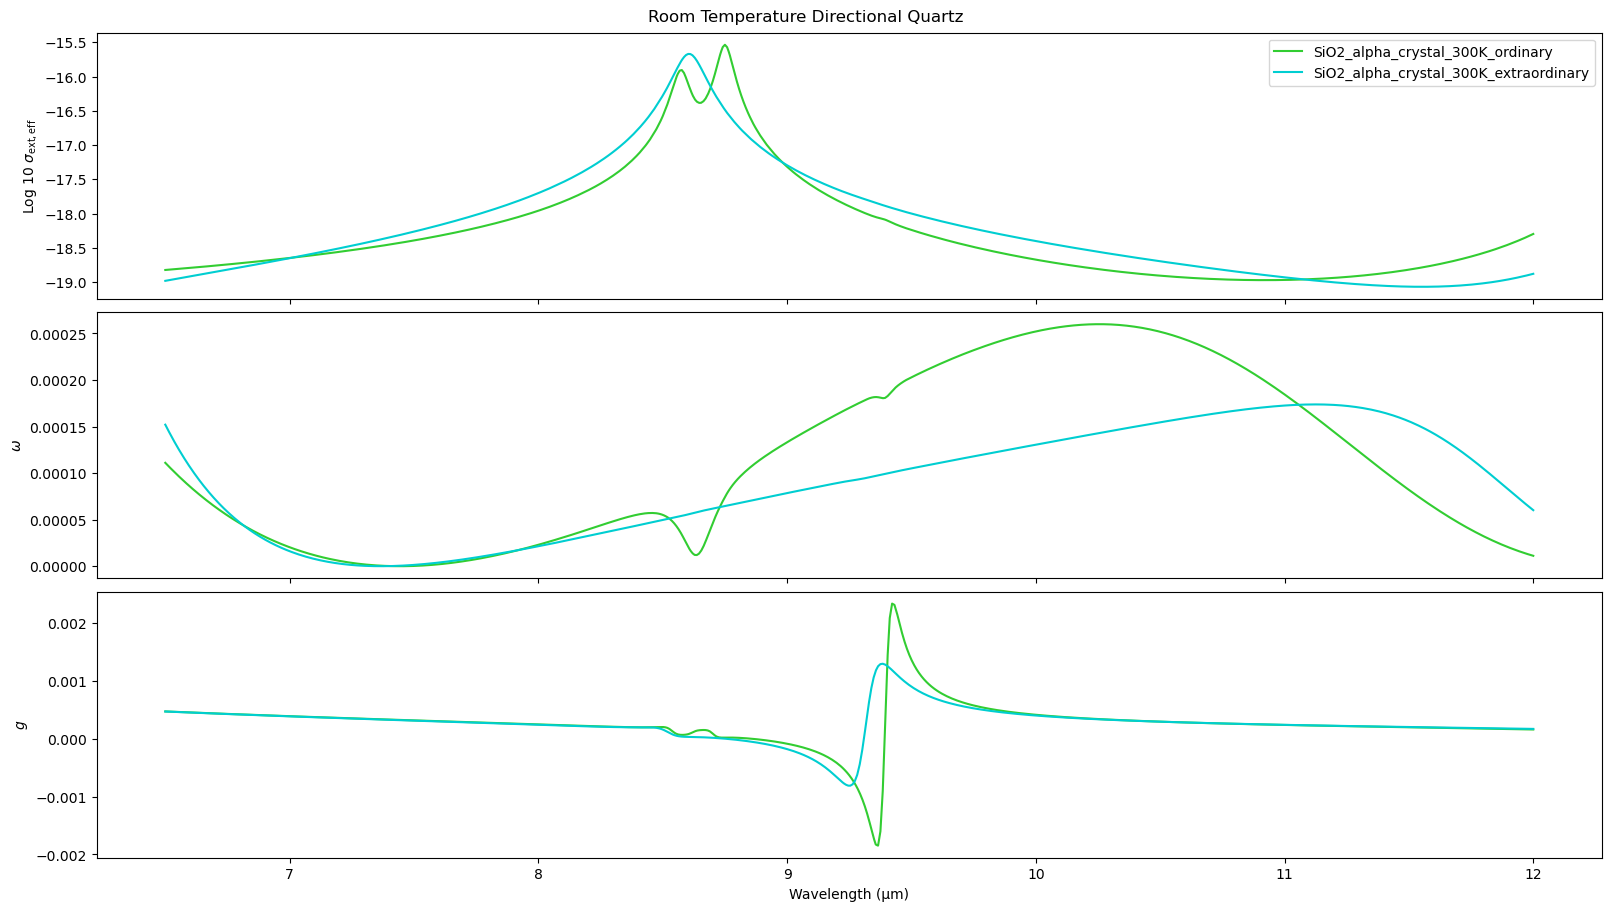

In [15]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 
import numpy as np

species = ['SiO2_alpha_crystal_300K_ordinary', 'SiO2_alpha_crystal_300K_extraordinary']

# Intialize wavelength grid
wl_min = 6.5    # Minimum wavelength (um)
wl_max = 12      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
grid_name = 'aerosol_directional'
aerosol_grid = load_aerosol_grid(species, grid = grid_name)

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = 0.01

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, [r_m, r_m], species,)

# Lets look at different mean radii
import matplotlib.pyplot as plt 

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9)) 

colors = ['limegreen', 'darkturquoise']

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    A
    B
    C
    """
)

for n, s in enumerate(species):

    # Lets load in the extinction cross section, asymmetry parameter, and single scattering albedo 
    eff_ext = sigma_Mie_interp_array[s]['eff_ext']
    eff_w = sigma_Mie_interp_array[s]['eff_w']
    eff_g = sigma_Mie_interp_array[s]['eff_g']

    # Plot 
    axd['A'].plot(wl, np.log10(eff_ext), label = s, color = colors[n])
    axd['B'].plot(wl, eff_w, label = s, color = colors[n])
    axd['C'].plot(wl, eff_g, label = s, color = colors[n])

plt.suptitle('Room Temperature Directional Quartz')
axd['A'].set_ylabel('Log 10 $\sigma_{\mathrm{ext,eff}}$')
axd['A'].set_xticklabels([])
axd['A'].legend()
axd['B'].set_ylabel('$\omega$')
axd['B'].set_xticklabels([])
axd['C'].set_ylabel('$g$')
axd['C'].set_xlabel('Wavelength (μm)')

Increasing temperature will shift the absorption of quartz and changes its morphology. Quartz will undergo a phase transition and transform from $\alpha$ quartz to $\beta$ quartz at ~850K.

Reading in database for aerosol cross sections...


Text(0.5, 0, 'Wavelength (μm)')

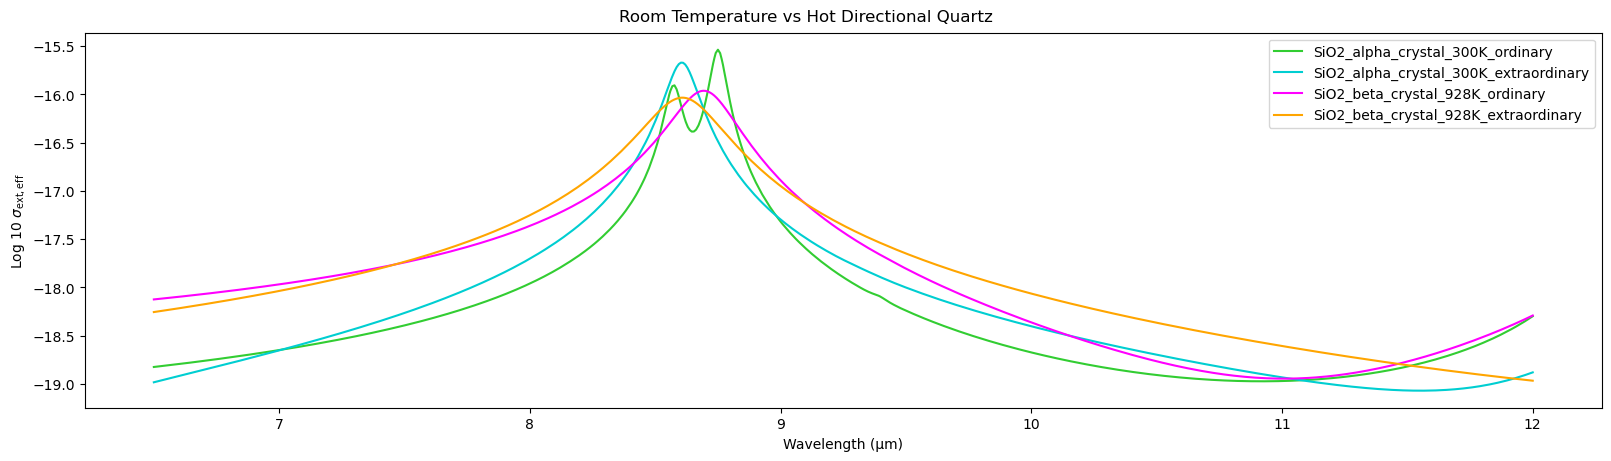

In [16]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 
import numpy as np

species = ['SiO2_alpha_crystal_300K_ordinary', 'SiO2_alpha_crystal_300K_extraordinary',
           'SiO2_beta_crystal_928K_ordinary', 'SiO2_beta_crystal_928K_extraordinary']

# Intialize wavelength grid
wl_min = 6.5    # Minimum wavelength (um)
wl_max = 12      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
grid_name = 'aerosol_directional'
aerosol_grid = load_aerosol_grid(species, grid = grid_name)

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = 0.01

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, [r_m, r_m, r_m, r_m], species,)

# Lets look at different mean radii
import matplotlib.pyplot as plt 

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 4.5))  

colors = ['limegreen', 'darkturquoise', 'magenta', 'orange']

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    A
    """
)

for n,s in enumerate(species):

    # Lets load in the extinction cross section, asymmetry parameter, and single scattering albedo 
    eff_ext = sigma_Mie_interp_array[s]['eff_ext']

    # Plot 
    axd['A'].plot(wl, np.log10(eff_ext), label = s, color = colors[n])

plt.suptitle('Room Temperature vs Hot Directional Quartz')
axd['A'].set_ylabel('Log 10 $\sigma_{\mathrm{ext,eff}}$')
axd['A'].legend()
axd['A'].set_xlabel('Wavelength (μm)')

Crystalline forsterite (Mg2SiO4) is biaxial, meaning it has three sets of refractive indices: E||c, E||b, E||a. For randomly oriented crystals, each refractive index gets a 1/3 weight. If the crystals are oriented, this can shift. 

For crystalline forsterite, the lab data labels the refractive indices B1U, B2U, and B3U which correlate to symmetry groups. This correlates to E||c, E||b, and E||a. 

The worlds of minerals have different notations for directions and how they map to c, b, a, so if you're ever unsure, refer to the Zenodo table in Mullens & Lewis 2025!

Reading in database for aerosol cross sections...


Text(0.5, 0, 'Wavelength (μm)')

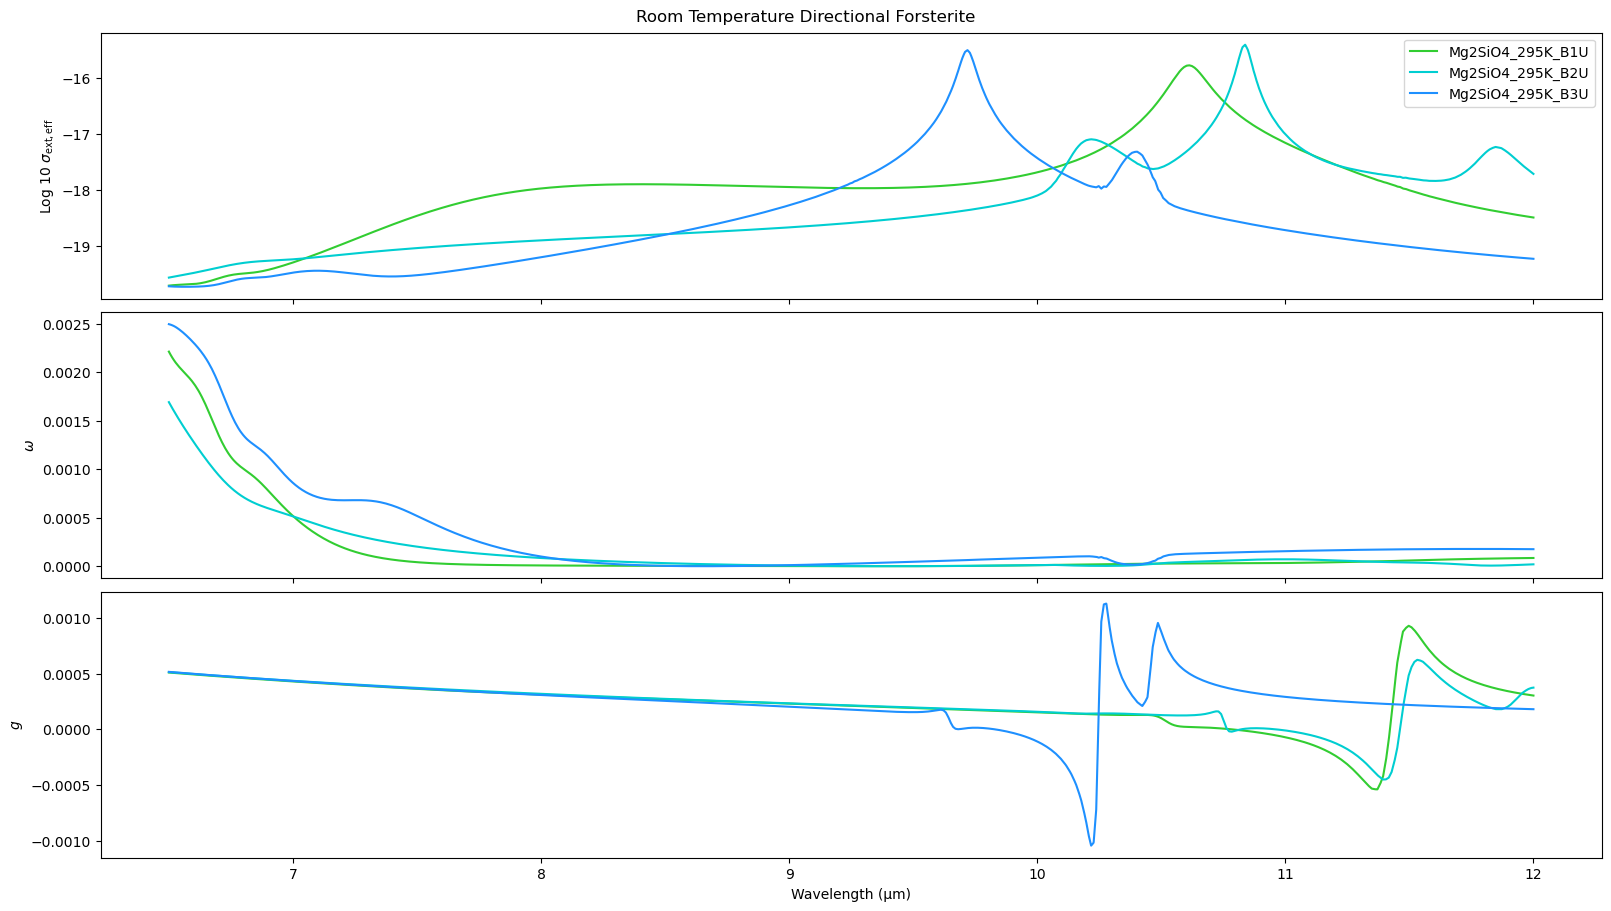

In [17]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 
import numpy as np

species = ['Mg2SiO4_295K_B1U','Mg2SiO4_295K_B2U','Mg2SiO4_295K_B3U']

# Intialize wavelength grid
wl_min = 6.5    # Minimum wavelength (um)
wl_max = 12      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
grid_name = 'aerosol_directional'
aerosol_grid = load_aerosol_grid(species, grid = grid_name)

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = 0.01

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, [r_m, r_m, r_m], species,)

# Lets look at different mean radii
import matplotlib.pyplot as plt 

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9)) 

colors = ['limegreen', 'darkturquoise', 'dodgerblue']

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    A
    B
    C
    """
)

for n, s in enumerate(species):

    # Lets load in the extinction cross section, asymmetry parameter, and single scattering albedo 
    eff_ext = sigma_Mie_interp_array[s]['eff_ext']
    eff_w = sigma_Mie_interp_array[s]['eff_w']
    eff_g = sigma_Mie_interp_array[s]['eff_g']

    # Plot 
    axd['A'].plot(wl, np.log10(eff_ext), label = s, color = colors[n])
    axd['B'].plot(wl, eff_w, label = s, color = colors[n])
    axd['C'].plot(wl, eff_g, label = s, color = colors[n])

plt.suptitle('Room Temperature Directional Forsterite')
axd['A'].set_ylabel('Log 10 $\sigma_{\mathrm{ext,eff}}$')
axd['A'].set_xticklabels([])
axd['A'].legend()
axd['B'].set_ylabel('$\omega$')
axd['B'].set_xticklabels([])
axd['C'].set_ylabel('$g$')
axd['C'].set_xlabel('Wavelength (μm)')

Lets increase the temperature of the forsterite and see what happens

Reading in database for aerosol cross sections...


Text(0.5, 0, 'Wavelength (μm)')

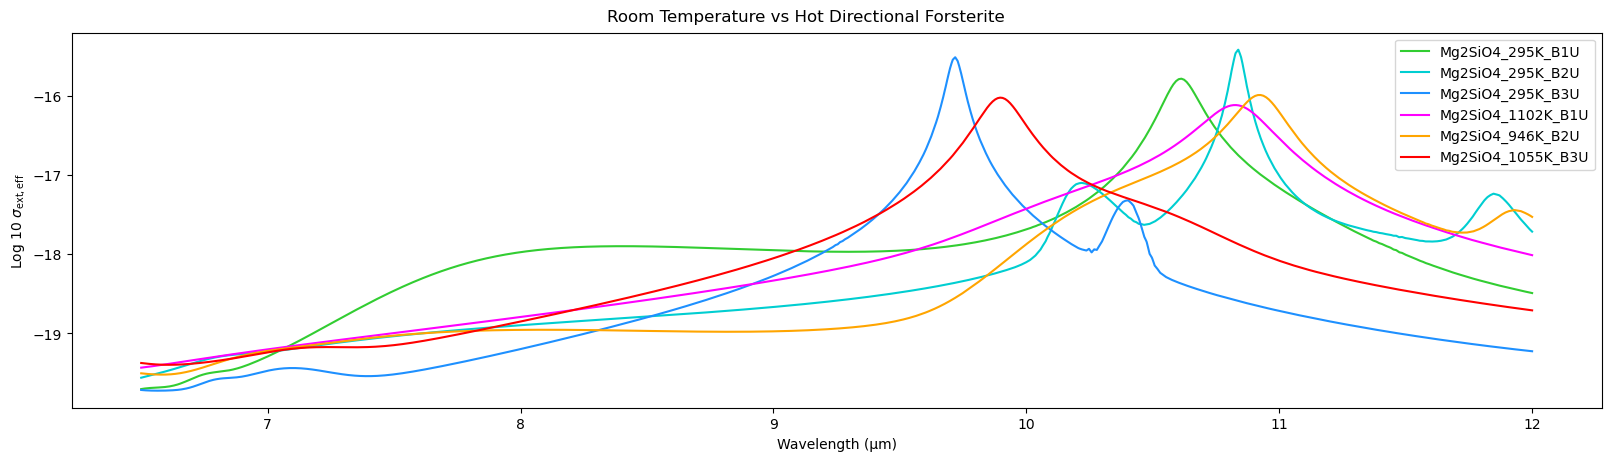

In [19]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 
import numpy as np

species = ['Mg2SiO4_295K_B1U','Mg2SiO4_295K_B2U','Mg2SiO4_295K_B3U',
           'Mg2SiO4_1102K_B1U','Mg2SiO4_946K_B2U','Mg2SiO4_1055K_B3U']

# Intialize wavelength grid
wl_min = 6.5    # Minimum wavelength (um)
wl_max = 12      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
grid_name = 'aerosol_directional'
aerosol_grid = load_aerosol_grid(species, grid = grid_name)

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = 0.01

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, [r_m, r_m, r_m, r_m, r_m, r_m], species,)

# Lets look at different mean radii
import matplotlib.pyplot as plt 

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 4.5))  

colors = ['limegreen', 'darkturquoise','dodgerblue', 'magenta', 'orange', 'red']

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    A
    """
)

for n,s in enumerate(species):

    # Lets load in the extinction cross section, asymmetry parameter, and single scattering albedo 
    eff_ext = sigma_Mie_interp_array[s]['eff_ext']

    # Plot 
    axd['A'].plot(wl, np.log10(eff_ext), label = s, color = colors[n])

plt.suptitle('Room Temperature vs Hot Directional Forsterite')
axd['A'].set_ylabel('Log 10 $\sigma_{\mathrm{ext,eff}}$')
axd['A'].legend()
axd['A'].set_xlabel('Wavelength (μm)')

# Part 2: Forward Models 

We have introduced four new variations to the aerosol 'slab' model to account for directionality of crystalline aerosols. 

Two are for uniaxial crystals (like quartz) and two are for biaxial crystals (like forsterite, enstatite, etc).

For each, there is a random variety that assumes the crystals have a random orientation. This model reduces the number of free parameters in the model by assuming that the cross sections are approriately weighted (2/3+1/3 for uniaxial, 1/3+1/3+1/3 for biaxial).

The other variety does not assume this, but instead assumed the mixing ratio of each orientation is a free parameters.

All four models assume the clouds are located in the same pressure region, and have the same mean particle size. 

Lets make all four models for Wasp-17b

1. For uniaxial models, the assumed order of aerosols is extraordinary first, then ordinary
2. For biaxial models, the assumed order of aerosols is E||c, E||b, E||a

If you are unsure of the correct order, consult the original paper the indices come from, or see the Zenodo paper (LINK HERE) from Mullens & Lewis 2025. 

In [21]:
from POSEIDON.constants import R_Sun, R_J
from POSEIDON.core import create_star, create_planet, load_data, define_model, \
                          wl_grid_constant_R, set_priors, read_opacities
from POSEIDON.visuals import plot_data, plot_spectra_retrieved, plot_PT_retrieved, \
                             plot_chem_retrieved
from POSEIDON.retrieval import run_retrieval
from POSEIDON.utility import read_retrieved_spectrum, read_retrieved_PT, \
                             read_retrieved_log_X, plot_collection
from POSEIDON.corner import generate_cornerplot

import numpy as np

from scipy.constants import parsec as pc


do_retrieval = True

#***** Model wavelength grid *****#

wl_min = 5     # Minimum wavelength (um)          0.55
wl_max = 30.0      # Maximum wavelength (um)          3.00
R = 20000         # Spectral resolution of grid      

# We need to provide a model wavelength grid to initialise instrument properties
wl = wl_grid_constant_R(wl_min, wl_max, R)

#***** Define stellar properties *****#

R_s = 1.49*R_Sun      # Stellar radius (m)
T_s = 6550.0          # Stellar effective temperature (K)
err_T_s = 100         # Value in ExoMast
Met_s = -0.25         # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.2         # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s, T_eff_error = err_T_s, 
                   stellar_grid = 'phoenix', wl = wl)

#***** Define planet properties *****#

planet_name = 'WASP-17b'  # Planet name used for plots, output files etc.

R_p = 1.87*R_J      # Planetary radius (m)
log_g_p = 2.7426    # Gravitational field of planet (m/s^2)
T_eq = 1699         # Equilibrium temperature (K)
d = 405.91*pc       # Distance to system (m)

# Create the planet object
planet = create_planet(planet_name, R_p, log_g = log_g_p, T_eq = T_eq, d = d)

#***** Define model *****#

model_name_SiO2_random = 'Alpha-Quartz-Random-Orientation'

bulk_species = ['H2', 'He']     # H2 + He comprises the bulk atmosphere
param_species = ['H2O']

aerosol_species = ['SiO2_alpha_crystal_300K_ordinary','SiO2_alpha_crystal_300K_extraordinary',]
model_random_sio2 = define_model(model_name_SiO2_random, bulk_species, param_species, 
                                PT_profile = 'isotherm',
                                cloud_model = 'Mie', cloud_type = 'uniaxial_random_slab',  #<------ set cloud_type = unixial_random_slab
                                aerosol_species = aerosol_species,
                                )

model_name_SiO2_directional = 'Beta-Quartz-Directional'

aerosol_species =  ['SiO2_beta_crystal_928K_ordinary', 'SiO2_beta_crystal_928K_extraordinary']
model_directional_sio2 = define_model(model_name_SiO2_directional, bulk_species, param_species, 
                                PT_profile = 'isotherm',
                                cloud_model = 'Mie', cloud_type = 'uniaxial_slab',          #<------ set cloud_type = unixial_slab
                                aerosol_species = aerosol_species,
                                )

model_name_Mg2SiO4_random = 'Room_Temp_Mg2SiO4_Random_Orientation'

bulk_species = ['H2', 'He']     # H2 + He comprises the bulk atmosphere
param_species = ['H2O']

aerosol_species = ['Mg2SiO4_295K_B1U','Mg2SiO4_295K_B2U','Mg2SiO4_295K_B3U',]
model_random_mg2sio4 = define_model(model_name_Mg2SiO4_random, bulk_species, param_species, 
                                    PT_profile = 'isotherm',
                                    cloud_model = 'Mie', cloud_type = 'biaxial_random_slab', #<------ set cloud_type = biaxial_random_slab
                                    aerosol_species = aerosol_species,
                                    )

model_name_Mg2SiO4_directional = 'Hot_Temp_Mg2SiO4_Directional'

aerosol_species = ['Mg2SiO4_1102K_B1U','Mg2SiO4_946K_B2U','Mg2SiO4_1055K_B3U']
model_directional_mg2sio4 = define_model(model_name_Mg2SiO4_directional, bulk_species, param_species, 
                                    PT_profile = 'isotherm',
                                    cloud_model = 'Mie', cloud_type = 'biaxial_slab',         #<------ set cloud_type = biaxial_slab
                                    aerosol_species = aerosol_species,
                                    )


This model assumes the first aerosol is ordinary (2/3 weight), then extraordinary (1/3 weight)
Reading in database for aerosol cross sections...
This model assumes the first aerosol is ordinary, then extraordinary
Reading in database for aerosol cross sections...
This model assumes the aerosols are in this order: E||c, E||b, E||a (1/3 weighting each is assumed)
Reading in database for aerosol cross sections...
This model assumes the aerosols are in this order:  E||c, E||b, E||a
Reading in database for aerosol cross sections...


Lets print out the cloud model params for the above models. 

Note that the random orientation models have less free parameters but stricter assumptions, whereas the directional models allow the data to pick the most favored crystal orientation (if you are running retrievals).

In [22]:
print(model_random_sio2['cloud_param_names'])
print()
print(model_directional_sio2['cloud_param_names'])
print()
print(model_random_mg2sio4['cloud_param_names'])
print()
print(model_directional_mg2sio4['cloud_param_names'])

['log_P_top_slab' 'Delta_log_P' 'log_r_m_uniaxial' 'log_X_uniaxial']

['log_P_top_slab' 'Delta_log_P' 'log_r_m_uniaxial' 'log_X_ordinary'
 'log_X_extraordinary']

['log_P_top_slab' 'Delta_log_P' 'log_r_m_biaxial' 'log_X_biaxial']

['log_P_top_slab' 'Delta_log_P' 'log_r_m_biaxial' 'log_X_Ec' 'log_X_Eb'
 'log_X_Ea']


In [25]:
# Some nominal values for W17b's atmosphere 

R_p_ref             =   1.69 * R_J
T                   =   1271.9
log_H2O             =   -2.96 
log_P_top_slab      =   -6.60
Delta_log_P         =   1.96 
log_r_m             =   -1.85

# Atmospheric pressure grid
P_min = 1.0e-8   # 10 nbar
P_max = 100       # 10 bar
N_layers = 100   # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

For the directional models, we will model the expected cross section (in transmission geoemtries) if the aerosols are mechanically aligned to the winds (labeled `Top' in Mullens & Lewis 2025)

In [23]:
# Mixing ratio of aerosols 

# Random models
log_X_uniaxial             =   -11.23
log_X_biaxial             =   -11.23

# Directional models

# Top oriented crystals are 100% ordinary
log_X_ordinary          = -11.23
log_X_extraordinary     = -50

# Top oriented biaxial crystals are 50% Eb and 50% Ea
log_X_Ec                = -50
log_X_Eb                = np.log10((10**log_X_biaxial)*0.5)
log_X_Ea                = np.log10((10**log_X_biaxial)*0.5)

In [27]:
from POSEIDON.core import make_atmosphere

PT_params = np.array([T])
log_X_params = np.array([log_H2O])

# Random orientation uniaxial
cloud_params = np.array([log_P_top_slab, Delta_log_P, log_r_m, log_X_uniaxial])

atmosphere_random_sio2 = make_atmosphere(planet, model_random_sio2, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

# Directional uniaxial
cloud_params = np.array([log_P_top_slab, Delta_log_P, log_r_m, log_X_ordinary, log_X_extraordinary])

atmosphere_directional_sio2 = make_atmosphere(planet, model_directional_sio2, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

# Random Orientation biaxial
cloud_params = np.array([log_P_top_slab, Delta_log_P, log_r_m, log_X_biaxial])

atmosphere_random_mg2sio4 = make_atmosphere(planet, model_random_mg2sio4, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

# Directional biaxial
cloud_params = np.array([log_P_top_slab, Delta_log_P, log_r_m, log_X_Ec, log_X_Eb, log_X_Ea])

atmosphere_directional_mg2sio4 = make_atmosphere(planet, model_directional_mg2sio4, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

In [28]:
from POSEIDON.core import read_opacities
from POSEIDON.core import define_model

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 400     # Same as prior range for T
T_fine_max = 3700    # Same as prior range for T
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

#***** Specify fixed atmospheric settings for retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-8   # 10 nbar
P_max = 100       # 10 bar
N_layers = 100   # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

# Now we can pre-interpolate the sampled opacities (may take up to a minute)
opac = read_opacities(model_random_sio2, wl, opacity_treatment, T_fine, log_P_fine)

Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
H2O done
Opacity pre-interpolation complete.


In [29]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate our first transmission spectrum
spectrum_random_sio2 = compute_spectrum(planet, star, model_random_sio2, atmosphere_random_sio2, opac, wl,
                            spectrum_type = 'transmission')

spectrum_directional_sio2 = compute_spectrum(planet, star, model_directional_sio2, atmosphere_directional_sio2, opac, wl,
                            spectrum_type = 'transmission')

spectrum_random_mg2sio4 = compute_spectrum(planet, star, model_random_mg2sio4, atmosphere_random_mg2sio4, opac, wl,
                            spectrum_type = 'transmission')

spectrum_directional_mg2sio4 = compute_spectrum(planet, star, model_directional_mg2sio4, atmosphere_directional_mg2sio4, opac, wl,
                            spectrum_type = 'transmission')

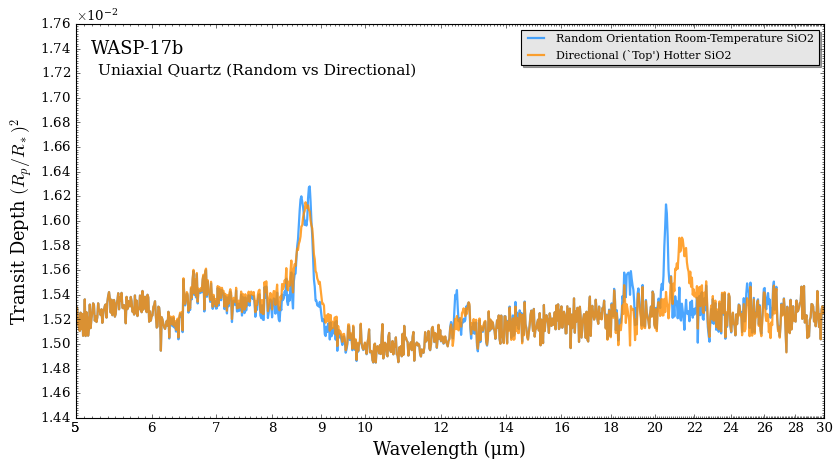

In [30]:
spectra = plot_collection(spectrum_random_sio2, wl, collection = [])
spectra = plot_collection(spectrum_directional_sio2, wl, collection = spectra)

# Produce figure and save to file
fig = plot_spectra(spectra, planet,
                   plt_label ='Uniaxial Quartz (Random vs Directional)',
                   plot_full_res = False, R_to_bin = 500, 
                   figure_shape = 'wide',
                   spectra_labels = ['Random Orientation Room-Temperature SiO2', 'Directional (`Top\') Hotter SiO2'],
                   colour_list = ['dodgerblue','darkorange'])

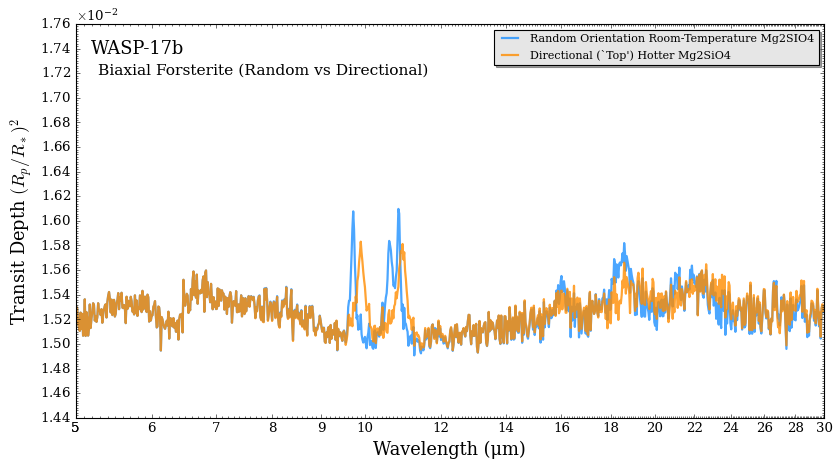

In [31]:
spectra = plot_collection(spectrum_random_mg2sio4, wl, collection = [])
spectra = plot_collection(spectrum_directional_mg2sio4, wl, collection = spectra)

# Produce figure and save to file
fig = plot_spectra(spectra, planet,
                   plt_label ='Biaxial Forsterite (Random vs Directional)',
                   plot_full_res = False, R_to_bin = 500, 
                   figure_shape = 'wide',
                   spectra_labels = ['Random Orientation Room-Temperature Mg2SIO4', 'Directional (`Top\') Hotter Mg2SiO4'],
                   colour_list = ['dodgerblue','darkorange'])

# Final Boss

Try and get your MIRI-LRS SNR good enough to detect this! 